1. Import the Required Libraries

In [1]:
import tensorflow as tf
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import imghdr
import cv2
import os

In [2]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu,True)

In [16]:
data_dir = 'data_200'

In [4]:
stable_list = os.listdir(os.path.join(data_dir, 'stable'))
mild_chatter_list = os.listdir(os.path.join(data_dir, 'mild chatter'))
chatter_list = os.listdir(os.path.join(data_dir, 'chatter'))

In [5]:
#[stable_list,, chatter_list]

In [6]:
#mild_chatter_list

In [7]:
#chatter_list

In [8]:
img1 = cv2.imread(os.path.join(data_dir,'stable','600.png'))
img2 = cv2.imread(os.path.join(data_dir,'mild chatter','1200.png'))
img3 = cv2.imread(os.path.join(data_dir,'chatter','1800.png'))

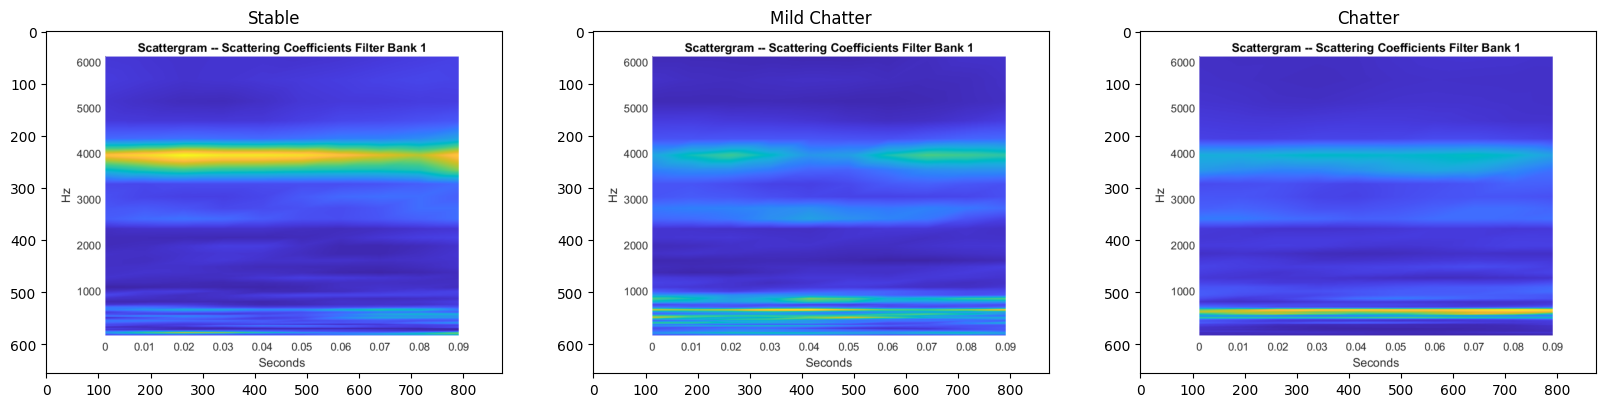

In [9]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,20))
ax1.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
ax1.set_title('Stable')
ax2.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
ax2.set_title('Mild Chatter')
ax3.imshow(cv2.cvtColor(img3, cv2.COLOR_BGR2RGB))
ax3.set_title('Chatter')
plt.show()

In [10]:
img1.shape

(656, 875, 3)

2. Load Data

In [11]:
data = tf.keras.utils.image_dataset_from_directory(data_dir,
        labels='inferred',
        label_mode='categorical',
        class_names=None,
        color_mode='rgb',
        batch_size=32,
        image_size=(256, 256))

Found 2250 files belonging to 3 classes.


In [12]:
class_names = data.class_names
print(class_names)

['chatter', 'mild chatter', 'stable']


In [13]:
data_iterator = data.as_numpy_iterator()

In [14]:
batch = data_iterator.next()
batch[1].shape

(32, 3)

In [15]:
batch[0]

array([[[[255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.],
         ...,
         [255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.]],

        [[255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.],
         ...,
         [255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.]],

        [[255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.],
         ...,
         [255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.]],

        ...,

        [[255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.],
         ...,
         [255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.]],

        [[255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.],
         ...,
         [255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.]],

        [[255., 255., 255.],
       

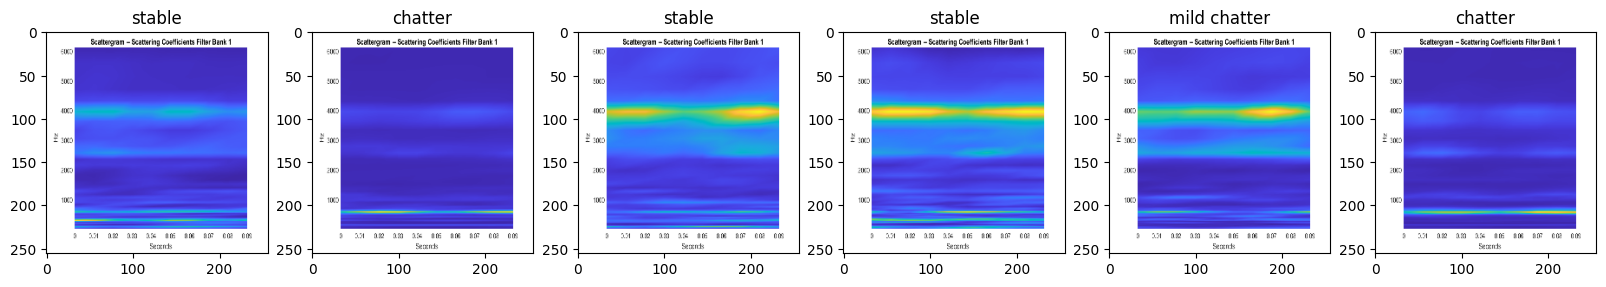

In [16]:
fig, ax = plt.subplots(nrows=1, ncols=6, figsize=(20,20))
for idx, img in enumerate(batch[0][:6]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(class_names[np.argmax(batch[1], axis=-1)[idx]])

2.1 Standardize the data

In [17]:
scaled_data = data.map(lambda x,y: (x/255, y))

In [18]:
scaled_iterator = scaled_data.as_numpy_iterator()
scaled_batch = scaled_iterator.next()

In [19]:
scaled_batch[0]

array([[[[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         ...,
         [1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]],

        [[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         ...,
         [1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]],

        [[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         ...,
         [1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]],

        ...,

        [[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         ...,
         [1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]],

        [[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         ...,
         [1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]],

        [[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         ...,
         [1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]]],


       [[[1., 1., 1.],
         [1., 1., 1.],
         [1., 

In [20]:
scaled_batch[0].shape

(32, 256, 256, 3)

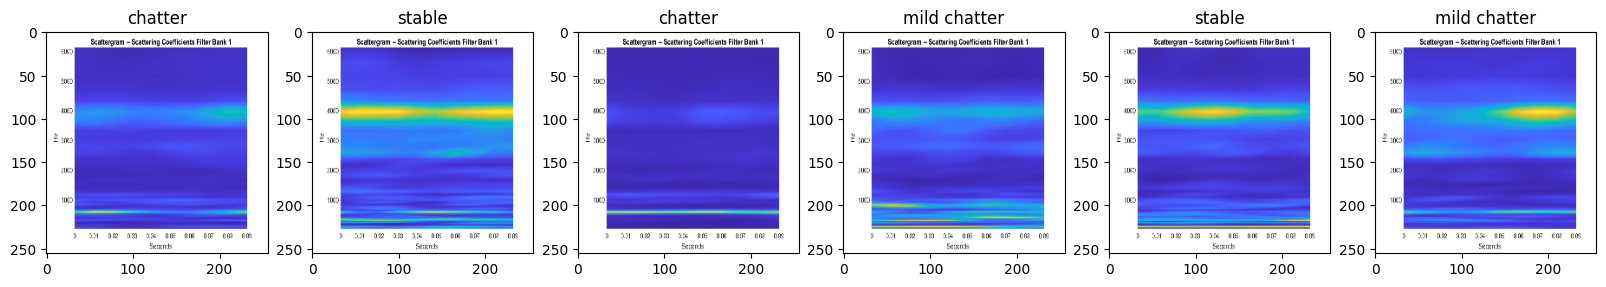

In [21]:
fig, ax = plt.subplots(nrows=1, ncols=6, figsize=(20,20))
for idx, img in enumerate(scaled_batch[0][:6]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(class_names[np.argmax(scaled_batch[1], axis=-1)[idx]])

2.2 Splitting the Data

In [22]:
train_size = int(len(scaled_data)*.7)
val_size = int(len(scaled_data)*.2)
test_size = int(len(scaled_data)*.1)+1

In [23]:
train = scaled_data.take(train_size)
val = scaled_data.skip(val_size).take(val_size)
test = scaled_data.skip(test_size+val_size).take(test_size)

In [24]:
len(data)

71

In [25]:
len(train)+len(val)+len(test)

71

2.3 Visulaize the Data

In [26]:
train_ds = train.as_numpy_iterator()
train_batch = train_ds.next()

In [27]:
train_batch[0].shape

(32, 256, 256, 3)

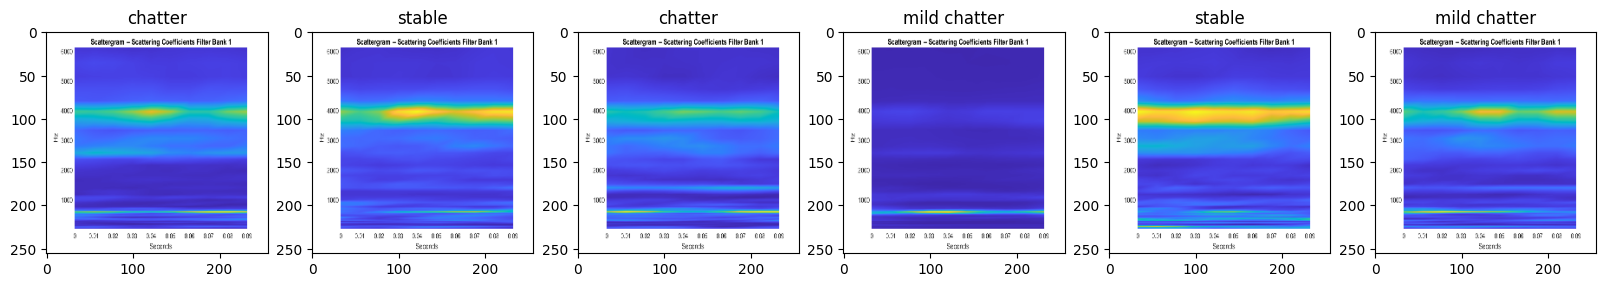

In [28]:
fig, ax = plt.subplots(nrows=1, ncols=6, figsize=(20,20))
for idx, img in enumerate(train_batch[0][:6]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(class_names[np.argmax(scaled_batch[1], axis=-1)[idx]])

3. Build a Deep Learning Model

In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [30]:
model = Sequential()

In [31]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(64, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(3, activation='softmax'))

In [32]:
model.compile('adam', loss=tf.losses.categorical_crossentropy, metrics=['accuracy'])

In [33]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 64)       0

In [34]:
logdir = 'logs_200'

In [35]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [36]:
hist = model.fit(train, epochs=50, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/50
49/49 [==============================] - 14s 130ms/step - loss: 0.7528 - accuracy: 0.6875 - val_loss: 0.3431 - val_accuracy: 0.8683
Epoch 2/50
49/49 [==============================] - 5s 90ms/step - loss: 0.3374 - accuracy: 0.8578 - val_loss: 0.2763 - val_accuracy: 0.8951
Epoch 3/50
49/49 [==============================] - 5s 90ms/step - loss: 0.2983 - accuracy: 0.8699 - val_loss: 0.2365 - val_accuracy: 0.9018
Epoch 4/50
49/49 [==============================] - 5s 90ms/step - loss: 0.2754 - accuracy: 0.8865 - val_loss: 0.2411 - val_accuracy: 0.9107
Epoch 5/50
49/49 [==============================] - 5s 91ms/step - loss: 0.2379 - accuracy: 0.8980 - val_loss: 0.1994 - val_accuracy: 0.9219
Epoch 6/50
49/49 [==============================] - 5s 90ms/step - loss: 0.2323 - accuracy: 0.9043 - val_loss: 0.1912 - val_accuracy: 0.9152
Epoch 7/50
49/49 [==============================] - 5s 90ms/step - loss: 0.1990 - accuracy: 0.9203 - val_loss: 0.1610 - val_accuracy: 0.9397
Epoch 8/50


In [37]:
#hist.history

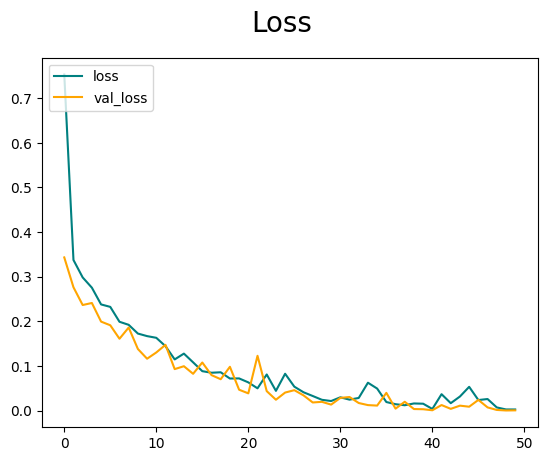

In [38]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

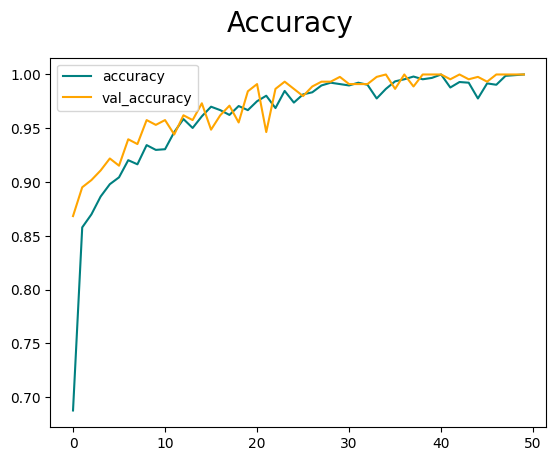

In [39]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [40]:
train_accuracy = hist.history['accuracy']
val_accuracy = hist.history['val_accuracy']

train_loss = hist.history['loss']
val_loss = hist.history['val_loss']

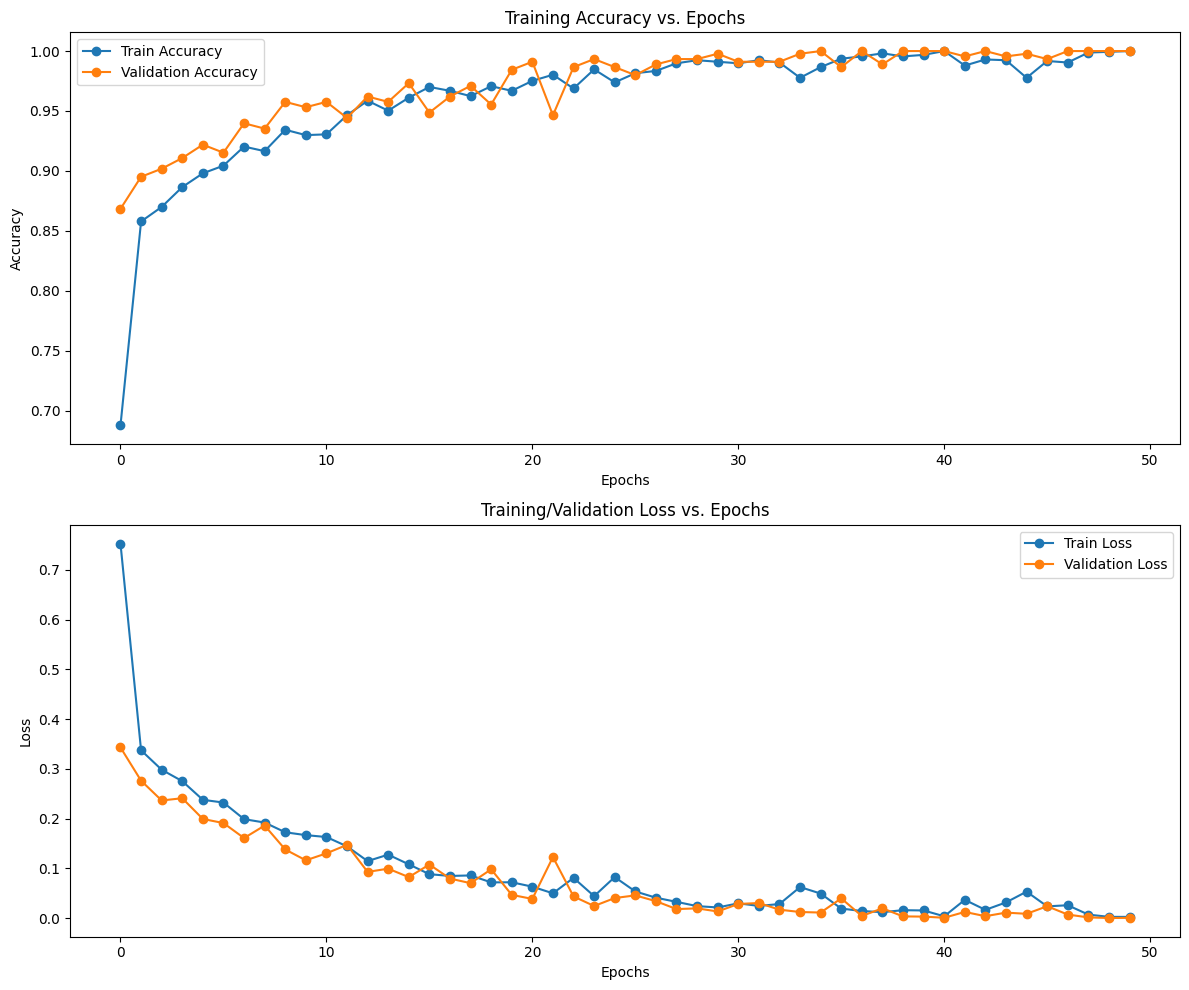

In [41]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(12, 10))

ax[0].set_title('Training Accuracy vs. Epochs')
ax[0].plot(train_accuracy, 'o-', label='Train Accuracy')
ax[0].plot(val_accuracy, 'o-', label='Validation Accuracy')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')
ax[0].legend(loc='best')

ax[1].set_title('Training/Validation Loss vs. Epochs')
ax[1].plot(train_loss, 'o-', label='Train Loss')
ax[1].plot(val_loss, 'o-', label='Validation Loss')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss')
ax[1].legend(loc='best')

plt.tight_layout()
plt.show()

In [42]:
predictions = model.predict(test)

8/8 [==============================] - 1s 60ms/step


In [43]:
test_loss, test_accuracy = model.evaluate(test)

8/8 [==============================] - 1s 59ms/step - loss: 0.0014 - accuracy: 1.0000


In [44]:
print(f"Test Loss:     {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

Test Loss:     0.0014205825282260776
Test Accuracy: 1.0


In [45]:
predictions.shape

(256, 3)

In [46]:
y_classes = [np.argmax(element) for element in predictions]
y_classes[:10]

[1, 2, 1, 2, 2, 0, 0, 1, 0, 2]

In [47]:
test.take(1)

<TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 3), dtype=tf.float32, name=None))>

first image to predict
actual label: stable
1/1 [==============================] - 0s 208ms/step
predicted label: stable


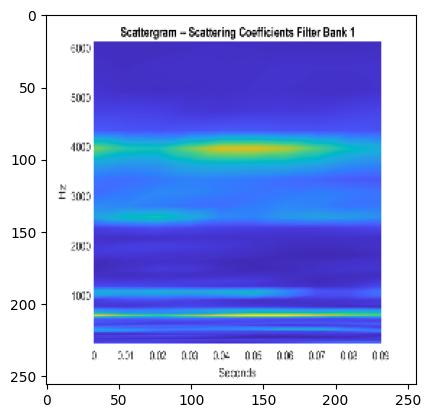

In [48]:
for images_batch, label_batch in test.take(1):
    first_image = images_batch[0].numpy()
    first_label = label_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[np.argmax(first_label, axis=-1)])
    
    batch_prediction = model.predict(images_batch)
    print("predicted label:", class_names[np.argmax(batch_prediction[0])])
    

In [49]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 17ms/step


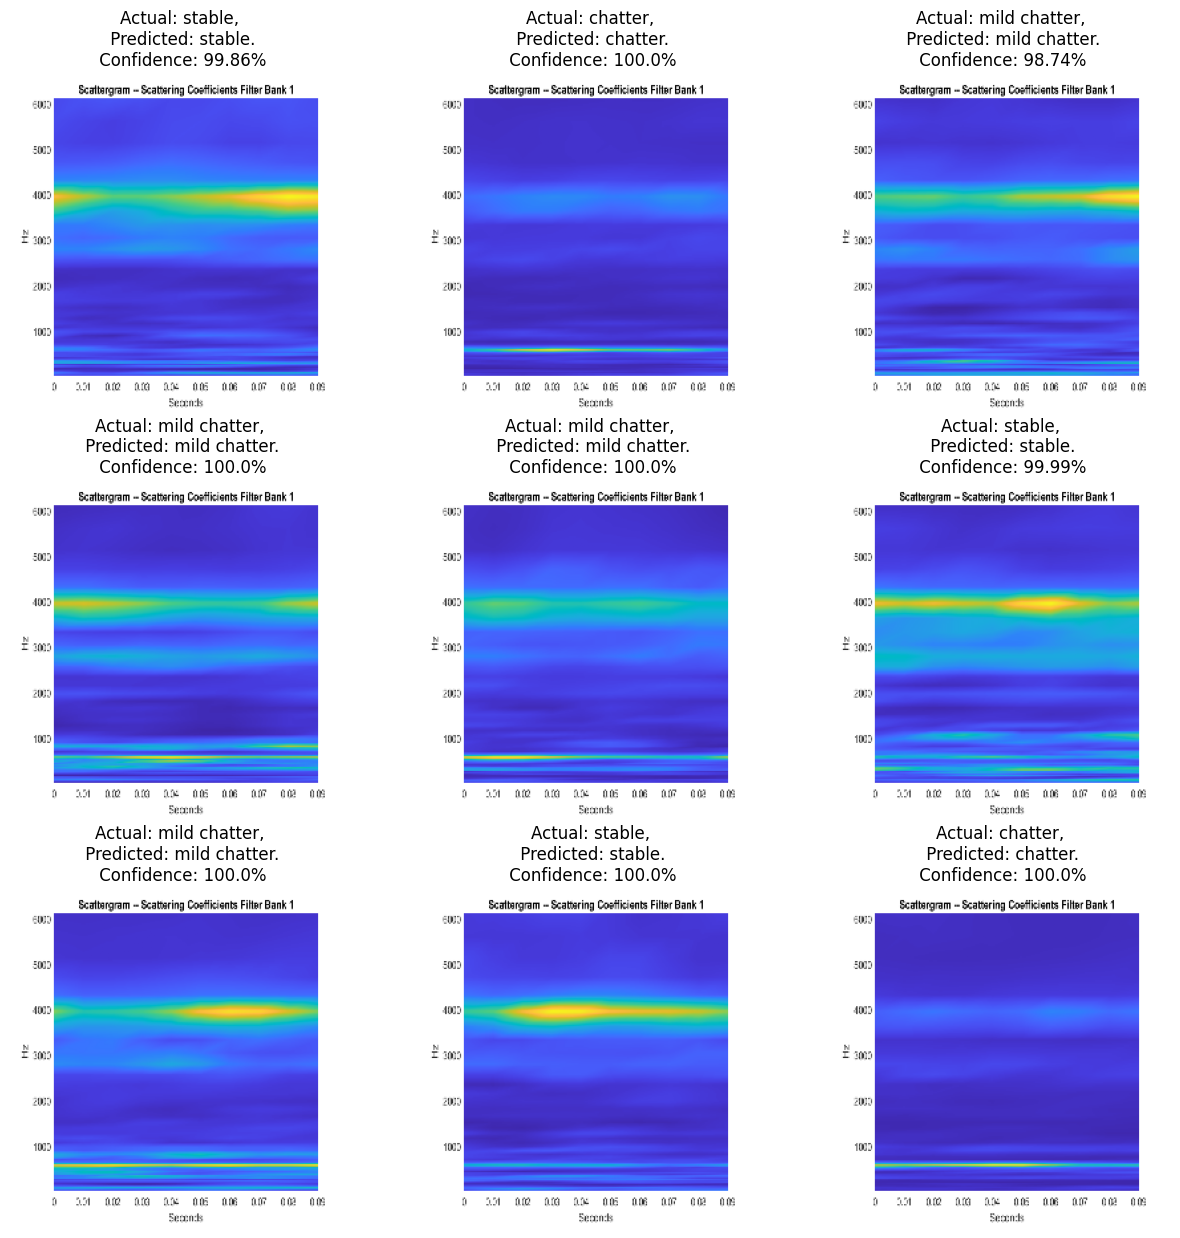

In [50]:
plt.figure(figsize=(15, 15))
for images, labels in test.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy())
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[np.argmax(labels[i], axis=-1)] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")

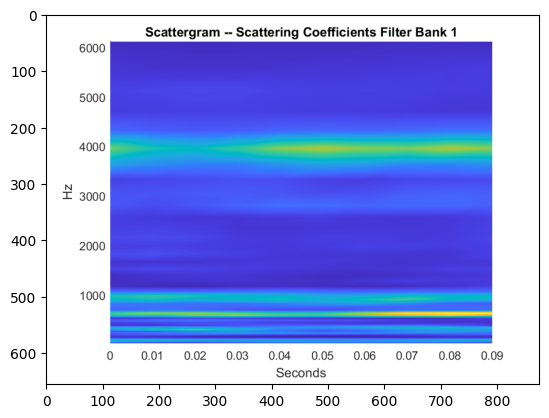

In [51]:
img = cv2.imread('mc_150.png')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

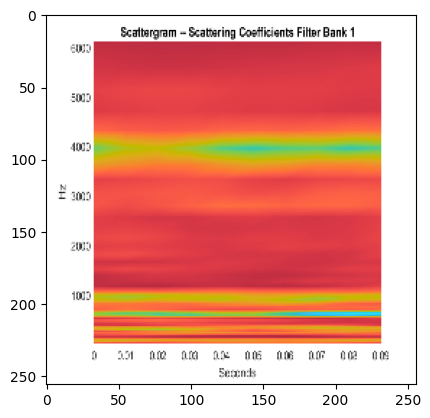

In [52]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [53]:
np.expand_dims(resize, 0).shape

(1, 256, 256, 3)

In [54]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 19ms/step


In [55]:
max_idx = np.argmax(yhat)
max_idx
if max_idx == 2:
    print(f'Predicted class is Stable')
if max_idx == 1:
    print(f'Predicted class is Mild Chatter')
if max_idx == 0:
    print(f'Predicted class is Chatter')

Predicted class is Chatter


4. Saving the Model

In [120]:
from tensorflow.keras.models import load_model

In [121]:
model.save(os.path.join('models','200.h5'))